
# Quantum information with polarized light

*Author: Nicolás Quesada*

In this tutorial we will explore how to model quantum photonic
experiments involving "internal" degrees of freedom of light, such as
polarization. Note that by default Strawberry Fields deals with
qumodes without an explicit commitment to what degree of freedom those
qumodes correspond to. Using polarization degrees of freedom allows us
to encode quantum information more densely. For example, one can use
the two orthogonal polarizations of a single photon to encode a single qubit.

Polarization is the ability of fields to oscillate in more than one
direction as they propagate. One can think of light as a transverse
field, meaning that it does not oscillate in the direction of
propagation. This implies that in our three-dimensional world light has
two directions in which it can oscillate that are perpendicular to its direction of propagation.
Because of this, a photon propagating in a certain direction $k$
can have two orthogonal polarizations. This is schematically shown below:

![](Figures/polarization.png)

In this tutorial, we will show how polarization "gates" implemented by half-wave plates
and polarizing beamsplitters can be mapped into the usual quantum
operations from Strawberry Fields. Then we will use this knowledge to simulate the generation
of a maximally entangled Bell state encoded in polarization degrees of
freedom.



## Manipulating polarization degrees of freedom

It turns out that the polarization degree of freedom of photons can be used
to encode information, and this information is typically manipulated
using so-called half-wave plates and polarizing beamsplitters.

### Half-wave plates

A half-wave plate (HWP) allows us to rotate the polarization of a photon. For
example,

\begin{align}\text{HWP} |1_H 0_V \rangle &= \frac{1}{\sqrt{2}} \left( |1_H 0_V \rangle + |0_H 1_V \rangle \right), \quad \text{(A)}\\
    \text{HWP} |0_H 1_V \rangle &= \frac{1}{\sqrt{2}} \left( |1_H 0_V \rangle - |0_H 1_V \rangle \right), \quad \text{(B)}\end{align}

where $\text{HWP}$ is a unitary operator representing
a half-wave plate, $|1_H \rangle$ is a single horizontally-polarized photon
and, similarly, $|1_V \rangle$ is a single vertically-polarized photon
The states in the right hand sides of the last
equation can be understood as single photons polarized along the diagonal
($+45^\circ$) and antidiagonal ($-45^\circ$) directions, as depicted below:

![](Figures/HWP.png)

The transformation above is written in the Schrödinger picture for
single photon inputs. It is often more fruitful to write it in the
Heisenberg picture as follows:

\begin{align}\text{HWP} ^\dagger a_H^\dagger \text{HWP} &= \frac{1}{\sqrt{2}}\left( a_H^\dagger + a_V^\dagger \right),\\
    \text{HWP} ^\dagger a_V^\dagger \text{HWP} &= \frac{1}{\sqrt{2}}\left( a_H^\dagger - a_V^\dagger \right),\end{align}

where we transformed the creation operators $a_{H/V}^\dagger$ of the modes.

### Polarizing beamsplitters

A polarizing beamsplitter (PBS) will transmit light of a certain
polarization while reflecting light from the orthogonal polarization.
This operation acts on two paths each having two polarizations. For two
spatial modes with two polarizations (a total of $4 = 2 \times 2$
creation operators) we can write its Heisenberg action as

\begin{align}\text{PBS}^\dagger a_{1,H}^\dagger \text{PBS} &= a_{1,H}^\dagger, \quad \text{(a)}\\
   \text{PBS}^\dagger a_{1,V}^\dagger \text{PBS} &= a_{2,V}^\dagger, \quad \text{(b)}\\
   \text{PBS}^\dagger a_{2,H}^\dagger \text{PBS} &= a_{2,H}^\dagger, \quad \text{(c)}\\
   \text{PBS}^\dagger a_{2,V}^\dagger \text{PBS} &= a_{1,V}^\dagger. \quad \text{(d)}\end{align}

Note that the horizontal polarizations of both modes are
unaffected (they are "transmitted") and that the vertical polarizations
are swapped (they are "reflected"). The action of the PBS is schematically shown below
for the different path and polarization modes:

![](Figures/PBS.png)

We can use a PBS to separate two photons with orthogonal polarizations
in the same path into two photons in different paths:

\begin{align}\text{PBS}|1_H 1_V, 0_H 0_V \rangle = |1_H 0_V, 0_H 1_V \rangle,\end{align}

where we used the notation $|x_H y_V,a_H b_V \rangle$
to indicate $x$ ($y$) horizontal (vertical) photons in mode
1, $a$ ($b$) horizontal (vertical) photons in mode 2.

## Mapping to Strawberry Fields gates

With the notation we developed above we are ready to simulate basic
polarization optical primitives using Strawberry Fields. We simply need
to recall that each optical path with two polarizations can be
represented using 2 qumodes.
For each path $i$, we associate qumodes $2i$ and $2i+1$ to its horizontal and vertical polarization respectively.

We can the associate Strawberry Fields gates with the polarization primitives discussed
above as follows:

\begin{align}\text{HWP}_i &\leftrightarrow \text{BSgate}_{2i,2i+1}\\
   \text{PBS}_{i,j} &\leftrightarrow \text{Permute}_{2i+1,2j+1} = \text{Interferometer}\left(\left[\begin{smallmatrix} 0&1 \\1&0 \end{smallmatrix} \right]\right)_{2i+1,2j+1}\end{align}

To see why the first association is true recall that a
HWP maps the creation operators of two polarizations in the same path to
linear combinations of the same operators, which is precisely what the
``BSgate`` does when applied to modes $2i$ and $2i+1$
representing the two orthogonal polarizations of path $i$.

To understand the second expression recall that a
$\text{PBS}$ simply swaps the vertical polarization of the two
paths, which correspond precisely to qumodes $2i+1$ and
$2j+1$. Finally, note that a swap is readily implemented in Strawberry Fields by
using the ``Interferometer`` gate with argument
$\left[\begin{smallmatrix} 0&1 \\1&0 \end{smallmatrix} \right]$.

## Simulating the generation of event-ready photon pairs

Zhang et al. [[#zhang]_] propose a method for generating postselected photonic maximally
entangled Bell states by using single photons input into an
interferometer. Their method uses a 4 spatial-path interferometer where
each path takes advantage of the two polarizations (vertical and
horizontal) of a photon. The circuit starts with four horizontal photons
in each of the paths and then proceeds as shown below

![](Figures/circuit_path.png)

Conditioned in two of the detectors collecting a single photon each and
the other two measuring vacuum, Zhang et al. show that the state of
modes 1 and 4 collapses to a two-photon maximally entangled Bell
state of the form

\begin{align}|\phi^+ \rangle \propto \left( |1_H 0_V, 1_H 0_V \rangle + |0_H 1_V, 0_H 1_V \rangle \right).\end{align}

With the rules established in the last section we can translate the
2-polarization 4-path circuit into a circuit with 8 qumodes as shown below



We are now ready to do the simulations!


In [1]:
# Import and preliminaries
import strawberryfields as sf
from strawberryfields.ops import Ket, BSgate, Interferometer
import numpy as np

cutoff_dim = 5  # (1+ total number of photons)
paths = 4
modes = 2 * paths

initial_state = np.zeros([cutoff_dim] * modes, dtype=np.complex)
# The ket below corresponds to a single horizontal photon in each of the modes
initial_state[1, 0, 1, 0, 1, 0, 1, 0] = 1
# Permutation matrix
X = np.array([[0, 1], [1, 0]])

# Here is the main program
# We create the input state and then send it through a network of beamsplitters and swaps.
prog = sf.Program(8)
with prog.context as q:
    Ket(initial_state) | q  # Initial state preparation
    for i in range(paths):
        BSgate() | (q[2 * i], q[2 * i + 1])  # First layer of beamsplitters
    Interferometer(X) | (q[1], q[3])
    Interferometer(X) | (q[5], q[7])
    BSgate() | (q[2], q[3])
    BSgate() | (q[4], q[5])
    Interferometer(X) | (q[3], q[5])
    BSgate().H | (q[2], q[3])
    BSgate().H | (q[4], q[5])

# We run the simulation
eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff_dim})
result = eng.run(prog)
state = result.state
ket = state.ket()

# Check the normalization of the ket.
# This does give the exact answer because of the cutoff we chose.
print("The norm of the ket is ", np.linalg.norm(ket))

2022-06-01 22:24:18.021186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 22:24:18.021205: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/tmp/ipykernel_37897/2018987820.py:10: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


The norm of the ket is  1.0


## Postselection

Let's consider the case where one horizontally-polarized photon is detected in both paths
2 and 3.




In [2]:
sub_ket1 = np.round(ket[:, :, 1, 0, 1, 0, :, :], 14)  # postselect on correct pattern
p1 = np.round(np.linalg.norm(sub_ket1) ** 2, 14)  # Check the probability of this event
print("The probability is ", p1)
print("The expected probability is ", 1 / 32)

# These are the only nonzero components
ind1 = np.array(np.nonzero(np.real_if_close(sub_ket1))).T
print("The indices of the nonzero components are \n ", ind1)

# And these are their coefficients
print("The nonzero components have values ", [sub_ket1[tuple(ind)] for ind in ind1])

The probability is  0.03125
The expected probability is  0.03125
The indices of the nonzero components are 
  [[0 1 0 1]
 [1 0 1 0]]
The nonzero components have values  [(0.125-0j), (0.125-0j)]


Thus up to normalization the postselected state is indeed $|\phi^+ \rangle$.




We can study all the successful postselections. To simplify tensor
manipulation we will move the modes in which we measure to be the first
4 modes of the tensor by using a transposition:




In [3]:
# Transpose the ket
ket_t = ket.transpose(2, 3, 4, 5, 0, 1, 6, 7)
# Postselection patterns:
patterns = [
    [1, 1, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
]

For each pattern we can construct the postselected ket, and find which
components are nonzero. Note that for each postselection there are only
two nonzero components, as expected for a Bell state.




In [4]:
sub_kets = [np.round(ket_t[tuple(ind)], 15) for ind in patterns]
ps = np.array(list(map(np.linalg.norm, sub_kets))) ** 2
indices = np.array([np.array(np.nonzero(sub_ket)).T for sub_ket in sub_kets])
print(
    "The indices of the nonzero components for the six different postselections are \n",
    indices,
)

# The successful postselection events occur with the same probability
print("The success probabilities for each pattern are the same \n", ps)

The indices of the nonzero components for the six different postselections are 
 [[[0 0 1 1]
  [1 1 0 0]]

 [[0 1 0 1]
  [1 0 1 0]]

 [[0 1 1 0]
  [1 0 0 1]]

 [[0 1 1 0]
  [1 0 0 1]]

 [[0 1 0 1]
  [1 0 1 0]]

 [[0 0 1 1]
  [1 1 0 0]]]
The success probabilities for each pattern are the same 
 [0.03125 0.03125 0.03125 0.03125 0.03125 0.03125]


## Conclusion

We have examined how to map the evolution of photonic systems with path
and polarization degrees of freedom into qumodes evolving under unitary
operations. The main takeaway is that a system with $N$ paths and
2 polarization degrees of freedom can be mapped into a system of
$2N$ qumodes. We have also explored in detail how the typical
optical elements used to couple path and polarization can be mapped to
qumode simulations. Finally, we used these identifications to
simulate the generation of event-ready (i.e. postselected) Bell states.




## References

.. [#zhang]

    Q. Zhang, X.-H. Bao, C.-Y. Lu, X.-Q. Zhou, T. Yang, T. Rudolph, and J.-W. Pan
    Physical Review A 77, 062316, 2008. doi:10.1103/PhysRevA.77.062316 .





# Quantum teleportation

To see how to construct and simulate a simple continuous-variable (CV) quantum circuit in Strawberry
Fields, let's consider the case of **state teleportation**.

## Background theory

Quantum teleportation - sometimes referred to as state teleportation to avoid confusion
with gate teleportation - is the reliable transfer of an unknown quantum state across
spatially separated qubits or qumodes, through the use of a classical transmission channel
and quantum entanglement [[2]_]. Considered a fundamental quantum information
protocol, it has applications ranging from quantum communication to enabling distributed
information processing in quantum computation [[3]_].

In general, all quantum teleportation circuits work on the same basic principle. Two
distant observers, Alice and Bob, share a maximally entangled quantum state (in discrete
variables, any one of the four `Bell states <https://en.wikipedia.org/wiki/Bell_state>`_;
or in CV, a maximally entangled state for a fixed energy), and have access to a classical
communication channel. Alice, in possession of an unknown state which she wishes to
transport to Bob, makes a joint measurement of the unknown state and her half of the
entangled state, by projecting onto the Bell basis. By transmitting the results of her
measurement to Bob, Bob is then able to transform his half of the entangled state to
an accurate replica of the original unknown state, by performing a conditional phase
flip (for qubits) or displacement (for qumodes) [[4]_].

While originally designed for discrete-variable quantum computation with qubits, the
(spatially separated) quantum teleportation algorithm described above can be easily
translated to CV qumodes; the result is shown in the following circuit:

![](Figures/teleport.png)

This process can be explained as follows:

1. Here, qumodes $q_1$ and $q_2$ are initially prepared as (the unphysical)
   infinitely squeezed vacuum states in momentum and position space respectively,

   $$
       &\ket{0}_x \sim \lim_{z\rightarrow\infty} S(z)\ket{0}\\ &\ket{0}_p \sim
       \lim_{z\rightarrow-\infty} S(z)\ket{0}=\frac{1}{\sqrt{\pi}}\int_{-\infty}^\infty \ket{x}~dx
   $$

   before being maximally entangled by a 50-50 beamsplitter:

   $ BS(\pi/4,0)(\ket{0}_p\otimes\ket{0}_x)$


2. These two qumodes are now spatially separated, with $\ket{q_1}$ held by
   Alice, and $\ket{q_2}$ held by Bob, with the two connected via the classical
   communication channels $c_0$ and $c_1$.


3. To teleport her unknown state $\ket{\psi}$ to Bob, Alice now performs a projective
   measurement of her entire system onto the maximally entangled basis states. This is done
   by entangling $\ket{\psi}$ and $\ket{q_1}$ via another 50-50 beamsplitter,
   before performing two homodyne measurements, in the $x$ and $p$ quadratures respectively.


4. The results of these measurements are then transmitted to Bob, who performs both a
   position displacement (conditional on the $x$ measurement) and a momentum
   displacement (conditional on the $p$ measurement) to recover exactly the
   transmitted state $\ket{\psi}$.


## Importing Strawberry Fields

The first thing we need to do is import Strawberry Fields; we do this with the following import
statements:


In [5]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
from numpy import pi, sqrt

# set the random seed
np.random.seed(42)

The first import statement imports Strawberry Fields as ``sf``, allowing us to access the engine
and backends; the second import statement imports all available CV gates into the global
namespace. Finally, we import $\pi$ and the square root from ``NumPy`` so that we can pass angle
parameters to gates such as beamsplitters, and perform some custom classical processing.

## Program initialization

We can now initialize our quantum program by instantiating a
`~strawberryfields.Program`

``sf.Program(num_subsystems, name=None)``

where

* ``num_subsystems`` (*int*) is the number of modes we want to initialize in our quantum register
* ``name`` (*str*) is the name of the program (optional)

> **Note:** By default, Strawberry Fields uses the convention $\hbar=2$ for the commutation relation
    $[\x,\p]=i\hbar$.

    Other conventions can also be chosen by setting the global variable
    ``sf.hbar`` at the beginning of a session.

    The value of $\hbar$ chosen modifies the application of the
    :class:`~strawberryfields.ops.Xgate` and :class:`~strawberryfields.ops.Zgate`, as well as the
    measurements returned by Homodyne measurement :class:`~strawberryfields.ops.MeasureHomodyne`, so this must be
    taken into account if the value of $\hbar$ is modified. All other gates are
    unaffected.

    See `conventions` for more details.

Therefore, to initialize a program on three quantum registers, we write:



In [6]:
prog = sf.Program(3)

## Circuit construction

To prepare states and apply gates to the quantum register ``q``, we must be inside the context of
the program we initialized using the ``with`` statement. Everything within the program context is
written using the `Blackbird quantum programming language <blackbird>`. For example, to
construct the following state teleportation circuit

![](Figures/teleport.png)

to teleport the coherent state $\ket{\alpha}$ where $\alpha=1+0.5i$:



In [7]:
alpha = 1+0.5j
r = np.abs(alpha)
phi = np.angle(alpha)

with prog.context as q:
    # prepare initial states
    Coherent(r, phi) | q[0]
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]

    # apply gates
    BS = BSgate(pi/4, pi)
    BS | (q[1], q[2])
    BS | (q[0], q[1])

    # Perform homodyne measurements
    MeasureX | q[0]
    MeasureP | q[1]

    # Displacement gates conditioned on
    # the measurements
    Xgate(sqrt(2) * q[0].par) | q[2]
    Zgate(-sqrt(2) * q[1].par) | q[2]

A couple of things to note here:

* **The quantum register returned from the** ``prog.context`` **context manager is a sequence**.
  Individual modes can be accessed via standard Python indexing and slicing techniques.

* **Preparing initial states, measurements, and gate operations all make use of the following
  syntax:**

  ``Operation([arg1, arg2, ...]) | reg``

  where the number of arguments depends on the specific operation, and ``reg`` is either a
  single mode or a sequence of modes, depending on how many modes the operation acts on. For a full
  list of operations and gates available, see the `quantum gates <gates>` documentation.

* **Every time a operation is applied it is added to the command queue**, ready to be simulated by
  the backend.

* **Operations must be applied in temporal order**. Different operation orderings can result in the
  same quantum circuit, providing the operations do not apply sequentially to the same mode. For
  example, we can permute the line containing ``MeasureX`` and ``MeasureP`` without changing the
  result.

* **Gates are standard Python objects, and can be treated as such**. In this case, since both
  beamsplitters use the same parameters, a single instance is being instantiated and stored under
  variable ``BS``.

* **The results of measured modes are passed to gates simply by passing the measured mode as an
  argument.** In order to perform additional classical processing to the measured mode ``q[i]``, and
  use the result to control a subsequent quantum operation, we can use the ``q[i].par`` attribute
  within the operation argument.

<div class="alert alert-info"><h4>Note</h4><p>By choosing a different phase for the 50-50 beamsplitter, that is, ``BSgate(pi/4,0)``, we can
    avoid having to negate the :class:`~strawberryfields.ops.Zgate` correction at the end of the
    circuit.</p></div>

## Executing the program

Once the program is constructed, we then must initialize an **engine**, which is responsible for
executing the program on a specified **backend** (which can be either a local simulator, or a
remote simulator/hardware device). Engines are initialized as follows:

``sf.Engine(backend, backend_options={})``

where

* ``backend``: a string or :class:`~strawberryfields.backends.BaseBackend` object representing
  the Strawberry Fields backend we wish to use; we have the choice of two Fock backends [[#]_], the
  NumPy based (``'fock'``) and TensorFlow (``'tf'``), and one Gaussian backend [[#]_]
  (``'gaussian'``).

  This argument is *required* when creating the engine.

* ``backend_options`` is a dictionary containing options specific to the chosen backend.

Let's choose the Fock backend for this particular example. Since we are working in the Fock basis,
we must also specify the Fock basis *cutoff dimension*; let's choose ``cutoff_dim=15``, such that
a state $\ket{\psi}$ has approximation

\begin{align}\ket{\psi} = \sum_{n=0}^\infty c_n\ket{n} \approx \sum_{n=0}^{\texttt{cutoff_dim}-1}
    c_n\ket{n}\end{align}

in our truncated Fock basis. We now have all the parameters ready to initialize the engine:



In [8]:
eng = sf.Engine('fock', backend_options={"cutoff_dim": 15})

<div class="alert alert-danger"><h4>Warning</h4><p>To avoid significant numerical error when working with the Fock backend, we need to make sure
    from now on that all initial states and gates we apply result in negligible amplitude in the
    Fock basis for Fock states $\ket{n}, ~~n\geq \texttt{cutoff_dim}$. For example, to
    prepare a squeezed vacuum state in the $x$ quadrature with ``cutoff_dim=10``, a
    squeezing factor of $r=1$ provides an acceptable approximation, since
    $|\braketD{n}{z}|^2<0.02$ for $n\geq 10$.</p></div>

We can now execute our quantum program ``prog`` on the engine via the
:meth:`~strawberryfields.Engine.run` method:



In [9]:
result = eng.run(prog, shots=1, modes=None, compile_options={})

The `eng.run <strawberryfields.Engine.run>` method accepts the arguments:
* ``program``: The `~strawberryfields.Program` to execute.
* ``shots``: A positive integer that specifies the number of times the program measurement
  evaluation is to be repeated.
* ``modes``: An optional list of integers that specifies which modes we wish the backend to
  return for the quantum state. If the state is a mixed state represented by a density matrix,
  then the backend will automatically perform a partial trace to return only the modes
  specified. Note that this only affects the returned state object---all modes remain in the
  backend circuit.
* ``compile_options``: A dictionary of keyword arguments to be used for program compilation. To
  ensure the ``~strawberryfields.Program`` will run on the specified backend, the engine will
  perform **program compilation**, by calling the `~strawberryfields.Program.compile`
  method.

>**Note:**A ``shots`` value different than 1 is currently only supported for one specific case: the
   `MeasureFock/Measure` operation executed on the Gaussian backend.

Other useful engine methods that can be called at any time include:

* `eng.print_applied() <strawberryfields.engine.BaseEngine.print_applied>`: Prints all
  commands applied using :meth:`eng.run <strawberryfields.engine.LocalEngine.run>` since the last
  backend reset/initialisation.

  - This may differ from your original constructed program due to program compilation. As a
    result, this shows all applied gate decompositions, which may differ depending on the backend.

* `eng.reset() <strawberryfields.engine.BaseEngine.reset>`: Resets the backend circuit to
  the vacuum state.

## Results and visualization

The returned `~strawberryfields.Result` object provides several useful properties for accessing the results
of your program execution:
* ``result.state``: The quantum state object contains details and methods for manipulation of the
  final circuit state.

  Note that only local simulators will return a state object. Remote simulators and hardware
  backends will return `measurement samples <strawberryfields.Result.samples>`, but the
  return value of ``state`` will be ``None``.

  Depending on backend used, the state returned might be a
  `~strawberryfields.backends.BaseFockState`, which represents the state using the
  Fock/number basis, or might be a `~strawberryfields.backends.BaseGaussianState`, which
  represents the state using Gaussian representation, as a vector of means and a covariance
  matrix. Many methods are provided for state manipulation, see `introduction/states` for
  more details.
* ``result.samples``: Measurement samples from any measurements performed. Returned measurement
  samples will have shape ``(shots, modes)``.

Once the engine has been run, we can extract results of measurements and the quantum state from
the circuit. Any measurements performed on a mode are stored attribute `result.samples
<strawberryfields.Result.samples>`:



In [10]:
print(result.samples)

[[0.19890199 0.17330173]]


If a mode has not been measured, this attribute simply returns ``None``.

In this particular example, we are using the Fock backend, and so the state that was returned by
``result.state`` is in the Fock basis. To double check this, we can inspect it with the ``print``
function:



In [11]:
print(result.state)
state = result.state

<FockState: num_modes=3, cutoff=15, pure=False, hbar=2>


In addition to the parameters we have already configured when creating and running the engine, the
line ``pure=False``, indicates that this is a mixed state represented as a density matrix, and not
a state vector.

To return the density matrix representing the Fock state, we can use the method `state.dm
<strawberryfields.backends.BaseFockState.dm>` [[#]_]. In this case, the density matrix has dimension



In [12]:
print(state.dm().shape)

(15, 15, 15, 15, 15, 15)


Here, we use the convention that every pair of consecutive dimensions corresponds to a subsystem;
i.e.,

\begin{align}\rho_{\underbrace{ij}_{q[0]}~\underbrace{kl}_{q[1]}~\underbrace{mn}_{q[2]}}\end{align}

Thus we can calculate the reduced density matrix for mode ``q[2]``, $\rho_2$:



In [13]:
rho2 = np.einsum('kkllij->ij', state.dm())
print(rho2.shape)

(15, 15)


<div class="alert alert-info"><h4>Note</h4><p>The Fock state also provides the method
    :meth:`~strawberryfields.backends.BaseFockState.reduced_dm` for extracting the reduced density
    matrix automatically.</p></div>

The diagonal values of the reduced density matrix contain the marginal Fock state probabilities
$|\braketD{i}{\rho_2}|^2,~~ 0\leq i\leq 14$:



In [14]:
probs = np.real_if_close(np.diagonal(rho2))
print(probs)

[3.10694907e-01 3.62467630e-01 2.11807608e-01 8.23802050e-02
 2.43874177e-02 5.83556629e-03 1.26776314e-03 2.37656289e-04
 8.43934922e-05 1.78787082e-06 1.52342119e-04 1.07036413e-05
 3.36055927e-04 1.47426072e-05 1.92773805e-04]


We can then use a package such as matplotlib to plot the marginal Fock state probability
distributions for the first 6 Fock states, for the teleported mode ``q[2]``:



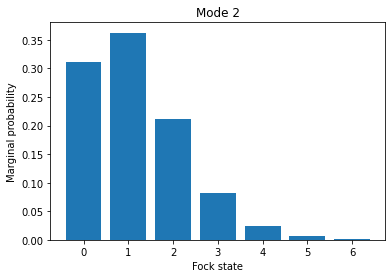

In [15]:
from matplotlib import pyplot as plt
plt.bar(range(7), probs[:7])
plt.xlabel('Fock state')
plt.ylabel('Marginal probability')
plt.title('Mode 2')
plt.show()

Note that this information can also be extracted automatically via the Fock state method
`~strawberryfields.backends.BaseFockState.all_fock_probs`:



In [16]:
fock_probs = state.all_fock_probs()
fock_probs.shape
np.sum(fock_probs, axis=(0,1))

array([3.10694907e-01, 3.62467630e-01, 2.11807608e-01, 8.23802050e-02,
       2.43874177e-02, 5.83556629e-03, 1.26776314e-03, 2.37656289e-04,
       8.43934922e-05, 1.78787082e-06, 1.52342119e-04, 1.07036413e-05,
       3.36055927e-04, 1.47426072e-05, 1.92773805e-04])

## Full program

The full Strawberry Fields program for teleportation is given by:

.. code-block:: python

    import strawberryfields as sf
    from strawberryfields.ops import *

    import numpy as np
    from numpy import pi, sqrt

    prog = sf.Program(3)

    alpha = 1+0.5j
    r = np.abs(alpha)
    phi = np.angle(alpha)

    with prog.context as q:
        # prepare initial states
        Coherent(r, phi) | q[0]
        Squeezed(-2) | q[1]
        Squeezed(2) | q[2]

        # apply gates
        BS = BSgate(pi/4, pi)
        BS | (q[1], q[2])
        BS | (q[0], q[1])

        # Perform homodyne measurements
        MeasureX | q[0]
        MeasureP | q[1]

        # Displacement gates conditioned on
        # the measurements
        Xgate(sqrt(2) * q[0].par) | q[2]
        Zgate(sqrt(2) * q[1].par) | q[2]

    eng = sf.Engine('fock', backend_options={'cutoff_dim': 15})
    result = eng.run(prog, shots=1, modes=None, compile_options={})



## Footnotes

.. [#] Fock backends are backends which represent the quantum state and operations via the Fock
       basis. These can represent *all* possible CV states and operations, but also introduce
       numerical error due to truncation of the Fock space, and consume more memory.

.. [#] The Gaussian backend, due to its ability to represent states and operations as Gaussian
       objects/transforms in the phase space, consumes less memory and is less computationally intensive
       then the Fock backends. However, it cannot represent non-Gaussian operations and states (such as
       the cubic phase gate, and Fock states, amongst others). The only exception is Fock measurements.
       The Gaussian backend can simulate these, but it does not update the post-measurement quantum
       state, which would be non-Gaussian.

.. [#] If using the Gaussian backend, state methods and attributes available for extracting the
       state information include:

       * :meth:`~strawberryfields.backends.BaseGaussianState.means` and
         :meth:`~strawberryfields.backends.BaseGaussianState.cov` for returning the vector of
         means and the covariance matrix of the specified modes
       * :meth:`~strawberryfields.backends.BaseState.fock_prob` for returning the probability that
         the photon counting pattern specified by ``n`` occurs
       * :meth:`~strawberryfields.backends.BaseState.reduced_dm` for returning the reduced density
         matrix in the fock basis of mode ``n``

## References

.. [1] Dagmar Bruß. Characterizing entanglement. Journal of Mathematical Physics,
       43(9):4237-4251, Sep 2002. URL: https://doi.org/10.1063/1.1494474, doi:10.1063/1.1494474.

.. [2] Charles H. Bennett, Gilles Brassard, Claude Crépeau, Richard Jozsa, Asher Peres, and
       William K. Wootters. Teleporting an unknown quantum state via dual classical and
       Einstein-Podolsky-Rosen channels. Physical Review Letters, 70:1895-1899, Mar 1993.
       doi:10.1103/PhysRevLett.70.1895.

.. [3] A. Furusawa and P. van Loock. Quantum Teleportation and Entanglement:
       A Hybrid Approach to Optical Quantum Information Processing. Wiley, 2011.
       ISBN 9783527635290. URL: https://books.google.ca/books?id=eKxHZ0UHEU4C.

.. [4] W.H. Steeb and Y. Hardy. Problems and Solutions in Quantum Computing and
       Quantum Information. World Scientific, 2006. ISBN 9789812567406.
       URL: https://books.google.ca/books?id=HGMy\_dSmfbkC.



# CV quantum gate visualizations


*Author: Brianna Gopaul*

In a conventional quantum circuit, qubits represented by wires are
operated on by quantum gates which collectively perform computations.
Similarily, continuous variable quantum computing uses qumodes that
represent bundles of interacting photons. To perform computations on
qumodes, we leverage Gaussian and non-Gaussian gates.

Gaussian and non-Gaussian gates can be described within the phase space.
This space is shown by the position and momentum axes.

Gaussian gates such as the squeezing and rotation gate act linearly on
modes. These gates can only reach positive quasi-probability
distributions and can be classically simulated. On the other hand,
non-Gaussian gates such as the Kerr gate and Cubic Phase gate act
nonlinearly. This property allows them to be in negative
quasi-probability distributions and not be classically simulated.

**In this notebook, we’ll learn about various single mode Gaussian and
non-Gaussian gates and apply them to a state using Strawberry Fields.**




In [17]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Vacuum State




The vacuum state is the lowest energy Gaussian state. It has no
displacement or squeezing in phase space.




Here we learn how to create the vacuum state on a quantum circuit with
one qumode.




We initialize the Strawberry Fields program. ``q`` represents a qumode
and below we start with one qumode for our circuit.




In [18]:
prog = sf.Program(1)

We declare our quantum circuit using the engine. We can prepare the
Vacuum state on one qumode using ``|``.




In [19]:
with prog.context as q:
    Vac | q[0]

eng = sf.Engine('gaussian')
state = eng.run(prog).state

It should be noted that the default state in strawberry fields is the
vacuum state. The above gate is listed to show the operation.




In Strawberry Fields, there are three main backends that can be used to
perform computations. The backend selected will depend on the task you
want to perform. Above, we’ve used the Gaussian backend to run our
vacuum state circuit. We can also alternatively use the Fock backend to
run the circuit. The third backend is the tensorflow backend ‘tf’. It
leverages tensorflow to create quantum machine learning models.




Using matplotlib, we then plot the Wigner function of the vacuum state,
which is a Gaussian distribution. The Wigner function quasi-probability
illustrates negative and positive regions in phase space. We’ll notice
below that Gaussian states such as the vacuum and squeezed state are in
positive regions of phase space while non-Gaussian states can reach
negative regions of the phase space. The y-axis on this plot can
describe the $\hat {p}$ quadrature or momentum operator and the
x-axis describes the $\hat{x}$ quadrature or position operator of
the state.




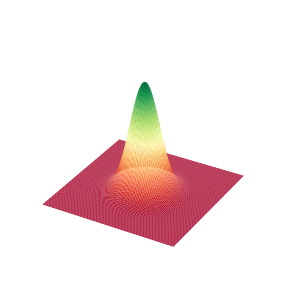

In [20]:
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

We can make a couple of observations from the Gaussian distribution
above. We notice that it has positive quasi-probability everywhere.
Later on, we’ll have a look at non-Gaussian gates that have regions of
negative quasi-probability. The vacuum state is also centered at 0 on
both the position axis $\hat {x}$ and momentum axis
$\hat {p}$.




## Squeezing Gate




The squeezing gate can also be thought of as a transformation on the
position and momentum axes. The squeezing gate scales $x$ to
$e^{ - r}\hat{x} _\phi$ and scales $p$ with
$e^{r}\hat{p} _\phi$. In the Wigner function, we can see the
probability distribution being lengthened on the momentum axis and being
pinched on the position axis. As the squeezing gate is a Gaussian gate,
there are no regions of negative quasi-probabilty.




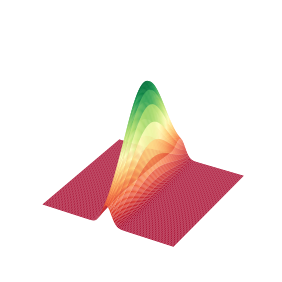

In [21]:
prog = sf.Program(1)
with prog.context as q:
    S = Sgate(1)
    S | q[0]


state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(4.8, 5)
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.set_axis_off()

The below animation shows the squeezing gate acting on the vacuum state
with increasing strengths of parameters. |squeezing|

.. |squeezing| image:: /tutorials/images/squeezinggif.gif





## Rotation Gate




The rotation gate shifts the $\hat{x}$ quadrature to
$\hat{x}$ $\cos \phi$ - $\hat{p}\sin$ $\phi$ and
$\hat{p}$ to $\hat{p}$ $\cos \phi$ +
$\hat{x}\sin$ $\phi$. In other words, the gate simply
rotates the phase space.




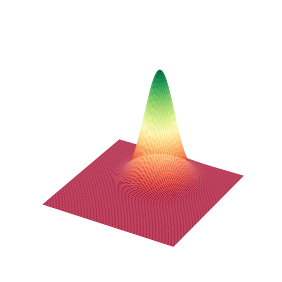

In [22]:
prog = sf.Program(1)
with prog.context as q:
    Dgate(1) | q[0]
    Rgate(np.pi/2) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

Above we apply the rotation gate to a coherent state. When compared to
the squeezed state in the previous example, the rotation gate simply
makes a rotation.




Similarily, the rotation gate is applied with an increasing parameter in
the below animation. |rotation|

.. |rotation| image:: /tutorials/images/rotation.gif





## Displacement Gate




The displacement gate has a specified complex value $\alpha$. It
shifts $\hat{x}$ by a value porportional to $Re(\alpha)$ and
the $\hat {p}$ by a value $Im({\alpha})$.




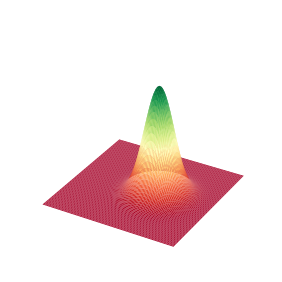

In [23]:
prog = sf.Program(1)
with prog.context as q:
    Dgate(0.55) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

As $\alpha$ increases in value, the state is displaced more to the
right. |disp|

.. |disp| image:: /tutorials/images/displacementgif.gif





## Cubic Phase Gate




The cubic phase gate shifts $\hat{p}$ by $\gamma\hat{x}^2$
where $\gamma$ is a definable parameter but does not transform
$\hat{x}$ in the phase space. Below, we decide to set
$\gamma=2$.




When running a circuit that contains any non-Gaussian gates, we use the
Fock backend. Depending on the backend used, different arguments will
have to be called. In this example, we define ‘cutoff_dim’ which tells
Strawberry Fields where to limit the Fock space.




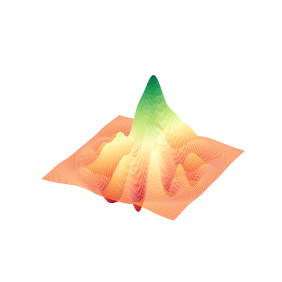

In [24]:
prog = sf.Program(1)
with prog.context as q:
    gamma = 2
    Vgate(gamma) | q[0]

#We use the fock backend and define the argument cutoff_dim
eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

Here we can see that the vacuum state has been shifted to a state where
it reaches negative quasi-probability distributions. |cubic|

.. |cubic| image:: /tutorials/images/cubicphasegif.gif





## Kerr Gate




Before we understand how the Kerr gate operates, we should first take
another look at the rotation gate. In the Fock basis, the rotation gate
acts with $e^{ i\phi \hat{n}}$. In comparison, the Kerr gates
transforms with $e^{ i\phi k \hat{n}^2}$. The $^2$ value is
what makes this state non-Gaussian and thus transforms the shape of the
state significantly.




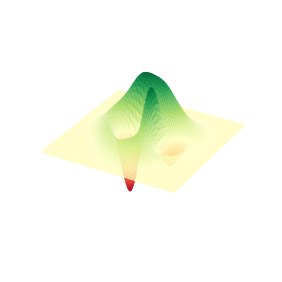

In [25]:
prog = sf.Program(1)
with prog.context as q:
    kappa = 1
    Dgate(1) | q[0]
    Kgate(kappa) | q[0]

eng.reset()
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

In the below Wigner function, the state is initially in a coherent
state. |kerr|

We can see it’s coherent structure morphing after the Kerr gate is
applied at different strengths.

.. |kerr| image:: /tutorials/images/kerrgif.gif





For more information about CV gates, see `the CV gates
section <https://strawberryfields.ai/photonics/conventions/gates.html>`__
in the Strawberry Fields documentation.




In [26]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline


.. role:: html(raw)
    :format: html


# Gate teleportation

In the quantum state teleportation algorithm, the quantum state is transferred from the sender
to the receiver exactly. However, quantum teleportation can be used in a much more powerful
manner, by simultaneously processing and manipulating the teleported state; this is known as
**gate teleportation**.

But the biggest departure from its namesake is the method in which the gate to be 'teleported'
is applied; rather than applying a quantum unitary directly to the first qumode in the system,
the unitary is applied via the projective measurement of the first qumode onto a particular basis.
This measurement-based approach provides significant advantages over applying unitary gates
directly, for example by reducing resources, and in the application of experimentally
hard-to-implement gates [[1]_]. In fact, gate teleportation forms a universal
quantum computing primitive, and is a precursor to cluster state models of quantum computation
[[2]_][[3]_].


## Implementation

First described by Gottesman and Chuang [[2]_] in the case of qubits, gate
teleportation was generalized for the CV case by Bartlett and Munro in 2003 [[4]_].
In an analogous process to the discrete-variable case, you begin with the algorithm for
**local state teleportation**:

![](Figures/gate_teleport1.png)

Note that:

* Unlike the spatially-separated quantum state teleportation we considered in the previous section,
  **local teleportation** can transport the state using only two qumodes; the state we are
  teleporting is entangled directly with the squeezed vacuum state in the momentum space through
  the use of a controlled-phase gate.


* The state is then teleported to qumode $q_1$ via a homodyne measurement in the computational
  basis (the position quadrature).


* Like in the previous section, to recover the teleported state exactly, we must perform Weyl-Heisenberg
  corrections to $q_1$; here, that would be $F^\dagger X(m)^\dagger$. However, for convenience and
  simplicity, we write the circuit without the corrections applied explicitly.

Rather than simply teleporting the state as-is, we can introduce an arbitrary unitary $U$ that
acts upon $\ket{\psi}$, as follows:

![](Figures/gate_teleport2.png)

Now, the action of the unitary $U$ is similarly teleported along with the initial state
--- this is a trivial extension of the local teleportation circuit. In order to view this in
as a measurement-based universal quantum computing primitive, we make a couple of important changes:

* The inverse Fourier gate is absorbed into the measurement, making it a homodyne detector in
  the momentum quadrature

* The unitary gate $U$, if diagonal in the computational basis (i.e., it is of the form
  $U=e^{i f(\hat{x}^i)}$), commutes with the controlled-phase gate
  ($CZ(s)=e^{i s ~\hat{x_1}\otimes\hat{x_2}/\hbar}$), and can be moved to the right of it.
  It is then also absorbed into the projective measurement.

![](Figures/gate_teleport3.png)

Additional gates can now be added simply by introducing additional qumodes with the appropriate
projective measurements, all 'stacked vertically' (i.e., coupled to the each consecutive qumode
via a controlled-phase gate). From this primitive, the model of cluster state quantum computation
can be derived [[3]_].

> **Note** What happens if the unitary is *not* diagonal in the computational basis? In this case,
    **feedforward** is required; additional qumodes and projective measurements are introduced,
    with successive measurements dependent on the previous result [[5]_].


## Code

Consider the following gate teleportation circuit,

![](Figures/gate_teleport_ex.png)

Here, the state $\ket{\psi}$, a squeezed state with $r=0.1$, is teleported to the
final qumode, with the quadratic phase gate (:class:`~strawberryfields.ops.Pgate`)
$P(s)=e^{is\hat{x}^2/2\hbar}$ teleported to act on it - with the quadratic phase gate
chosen as it is diagonal in the $\x$ quadrature. This can be easily implemented
using Strawberry Fields:


In [27]:
import numpy as np

# set the random seed
np.random.seed(42)

import strawberryfields as sf
from strawberryfields.ops import *

gate_teleportation = sf.Program(3)

with gate_teleportation.context as q:
    # create initial states
    Squeezed(0.1) | q[0]
    Squeezed(-2)  | q[1]
    Squeezed(-2)  | q[2]

    # apply the gate to be teleported
    Pgate(0.5) | q[1]

    # conditional phase entanglement
    CZgate(1) | (q[0], q[1])
    CZgate(1) | (q[1], q[2])

    # projective measurement onto
    # the position quadrature
    Fourier.H | q[0]
    MeasureX  | q[0]
    Fourier.H | q[1]
    MeasureX  | q[1]

Some important notes:

* As with the :doc:`state teleportation circuit <run_teleportation>`, perfectly squeezed vacuum states
  are not physically realizable; preparing the states with a squeezing factor of $|r|=2$
  ($\sim 18\text{dB}$) is a reasonable approximation.
* The Blackbird notation ``Operator.H`` denotes the Hermitian conjugate of the corresponding
  operator.
* Here, we do not make the corrections to the final state; this is left as an exercise to the reader.
  For additional details, see the gate teleportation commutation relations derived by van Loock
  [[5]_].

Since all operations in the above gate teleportation circuit are Gaussian, we can use the
``"gaussian"`` backend:



In [28]:
eng = sf.Engine(backend="gaussian")

Running the engine, and printing out the reduced state of modes 2
and 3:



In [29]:
results = eng.run(gate_teleportation)
_, cov = results.state.reduced_gaussian([2])
print("Covariance matrix:\n", cov)

Covariance matrix:
 [[ 1.11257261 -0.5851662 ]
 [-0.5851662   1.20659044]]


We can also extract the measurement results of modes 0 and 1:



In [30]:
m0, m1 = results.samples[0]
print(m0, m1)

-1.0330069405382953 10.86483685522621


To easily check that the output of the circuit is as expected, we can make sure that it agrees
with the (uncorrected) state

\begin{align}X({q_1})FP(0.5)X(q_0)F \ket{z}.\end{align}



In [31]:
check = sf.Program(1)

with check.context as q:
    # compare against the expected output
    # X(q1/sqrt(2)).F.P(0.5).X(q0/sqrt(0.5)).F.|z>
    # not including the corrections
    Squeezed(0.1) | q[0]
    Fourier       | q[0]
    Xgate(m0)     | q[0]
    Pgate(0.5)    | q[0]
    Fourier       | q[0]
    Xgate(m1)     | q[0]

eng = sf.Engine(backend="gaussian")
results = eng.run(check)
expected_cov = results.state.cov()

print("Expected covariance matrix:\n", expected_cov)

Expected covariance matrix:
 [[ 1.12408144 -0.61070138]
 [-0.61070138  1.22140276]]


These two states should be identical:



In [32]:
print(np.allclose(cov, expected_cov, atol=0.05, rtol=0))

True


## References

.. [1] A. Furusawa and P. van Loock. Quantum Teleportation and Entanglement:
       A Hybrid Approach to Optical Quantum Information Processing. Wiley, 2011.
       ISBN 9783527635290. URL: https://books.google.ca/books?id=eKxHZ0UHEU4C.

.. [2] D. Gottesman and I. L. Chuang. Demonstrating the viability of universal quantum
       computation using teleportation and single-qubit operations. Nature,
       402:390–393, Nov 1999. arXiv:quant-ph/9908010, doi:10.1038/46503.

.. [3] Mile Gu, Christian Weedbrook, Nicolas C. Menicucci, Timothy C. Ralph, and
       Peter van Loock. Quantum computing with continuous-variable clusters.
       Physical Review A, 79:062318, Jun 2009. doi:10.1103/PhysRevA.79.062318.

.. [4] Stephen D. Bartlett and William J. Munro. Quantum teleportation of
       optical quantum gates. Physical Review Letters, 90:117901, Mar 2003.
       doi:10.1103/PhysRevLett.90.117901.

.. [5] Peter van Loock. Examples of gaussian cluster computation. Journal of the
       Optical Society of America B, 24(2):340–346, Feb 2007. doi:10.1364/JOSAB.24.000340.



# Gaussian cloning


A fundamental concept in quantum mechanics, the `no-cloning theorem
<https://en.wikipedia.org/wiki/No-cloning_theorem>`_ states that an unknown quantum
state cannot be copied exactly [[2]_] - in effect, ruling out any algorithm
that attempts to produce or relies upon the production of perfect copies of an arbitrary
quantum state [[3]_]. Nevertheless, the no-cloning theorem does not rule out
the production of *approximate* quantum state clones. This has led to the development
of so called 'quantum cloning algorithms', unitary cloning transformations which provide
identical copies of an arbitrary input state, at the cost of a non-unity fidelity.

## Implementation

The first approximate cloning algorithm was introduced in the context of discrete-variable
quantum computing by Buzek and Hillery [[4]_], and quickly followed up with a CV
implementation by Cerf et al. [[5]_]. Here, a class of cloning machines
satisfying *displacement covariance* are introduced; that is, for two input states
$\ket{\psi}$ and $\ket{\phi}$, with approximate cloned states $\ket{\psi'}$
and $\ket{\phi'}$ respectively,

\begin{align}D(\alpha)\ket{\psi}=\ket{\phi}~~~\Rightarrow~~~D(\alpha)\ket{\psi'}=\ket{\phi'}\end{align}

In other words, cloning fidelity is **invariant** under displacements in the phase space,
and the position and momentum uncertainties of the two clones satisfies the uncertainty inequality

\begin{align}\Delta x_1\Delta p_2 \geq \frac{1}{2}\hbar\end{align}

where $\Delta x_1$ is the $x$ quadrature variance of state $\ket{\psi}$
and $\Delta p_2$ is the $p$ quadrature variance of state $\ket{\phi}$.

**Gaussian cloning algorithms**, those with the ability to produce two approximate and
identical clones of the input state with theoretically optimum fidelity, are a subclass
of the displacement covariant cloners that also exhibit **rotational covariance**. As a
result, Gaussian cloning fidelity is invariant under both displacement and rotation in the
phase space, and the resulting cloned states have identical $x$ and $p$
quadrature variances, $\Delta x_1=\Delta p_1=\Delta x_2=\Delta p_2$. It is this
subclass which is shown to be the CV equivalent to the universal qubit cloner of Buzek
and Hillery [[5]_].

### Circuit analysis

Working within this framework, Andersen et al. [[6]_] presented a symmetric
Gaussian cloning algorithm (in addition to experimental results) for optimum theoretical
cloning of coherent states:

![](Figures/cloning.png)

Here, $\ket{\alpha_0}$ represents an input coherent state, $\ket{\alpha'}_1$
and $\ket{\alpha'}_3$ represent the two identical but approximate clones, and the
beamsplitters are 50-50 beamsplitters (hence the 'symmetric' in symmetric cloning algorithm).
Let's walk through the various stages of the circuit above, and examine what is occuring.

1. The action of a 50-50 beamsplitter on a coherent state $\ket{\alpha}$ and a vacuum
   state $\ket{0}$ is
   $BS(\ket{\alpha}\otimes\ket{0}) = \ket{\frac{1}{\sqrt{2}}\alpha}\otimes \ket{\frac{1}{\sqrt{2}}\alpha}$.
   As such, after the two beamsplitters, the circuit exists in the following state:

   $$

       \ket{\frac{1}{\sqrt{2}}\alpha_0}\otimes \ket{\frac{1}{2}\alpha_0}\otimes \ket{\frac{1}{2}\alpha_0}.
   $$

2. Performing the homodyne detection on modes $q_1$ and $q_2$ results in
   the two normally distributed measurement variables $u$ and $v$ respectively:

   $$
       u\sim N\left(\sqrt{\frac{\hbar}{2}}\text{Re}(\alpha_0),
       \frac{\hbar}{2}\right), ~~~ v\sim N\left(\sqrt{\frac{\hbar}{2}}\text{Im}(\alpha_0),
       \frac{\hbar}{2}\right).
   $$

3. Two controlled displacements $X(\sqrt{2}u)=D(u/\sqrt{\hbar})$ and
   $Z(\sqrt{2}v)=D(iv/\sqrt{\hbar})$ are then performed on mode $q_0$:

   $$

       D\left(\frac{1}{\sqrt{\hbar}}(u+iv)\right)\ket{\frac{1}{\sqrt{2}}\alpha_0}
       = \ket{\frac{1}{\sqrt{2}}\alpha_0 + \frac{1}{\sqrt{\hbar}}(u+iv)} = \ket{\tilde{\alpha_0}}
   $$

   Since we are displacing a coherent state, the result of the controlled displacements
   remains a pure coherent state. However, since the parameters of the controlled displacements
   are themselves random variables, we must describe the resulting coherent state by a rando
   variable $\tilde{\alpha_0} \sim N(\mu, \text{cov})$.

   Here, $\tilde{\alpha_0}$ is randomly distributed as per a multivariate normal
   distribution with vector of means $\mu=\sqrt{2}(\text{Re}(\alpha_0), \text{Im}(\alpha_0))$
   and covariance matrix $\text{cov}=\I/2$.


4. Finally, we apply another beamsplitter to mode $q_0$ and mode $q_3$ in the
   vacuum state, to get our two cloned outputs:

   $$

       BS(\ket{\tilde{\alpha_0}}\otimes\ket{0}) = \ket{\frac{1}{\sqrt{2}}\tilde{\alpha_0}}\otimes
       \ket{\frac{1}{\sqrt{2}}\tilde{\alpha_0}} = \ket{\alpha'}\otimes \ket{\alpha'}.
   $$

   where $\alpha' \sim N(\mu, \text{cov}), ~~\mu=(\text{Re}(\alpha_0), \text{Im}(\alpha_0)), ~~\text{cov}=\I/4$.

### Coherent average fidelity

If we were to perform the Guassian cloning circuit over an ensemble of identical input
states $\ket{\alpha_0}$, the cloned output can be described by the following mixed state,

\begin{align}\rho = \iint d^2 \alpha' \frac{2}{\pi}e^{-2|\alpha'-\alpha_0|^2}\ket{\alpha'}\bra{\alpha'},\end{align}

where the exponential term is the PDF of the random variable $\alpha'$ from (4) above.
To calculate the average fidelity over the ensemble of the cloned states, it is sufficient
to calculate the inner product

\begin{align}F = \braketT{\alpha_0}{\rho}{\alpha_0}.\end{align}

From the Fock basis decomposition of the coherent state (see `coherent_state`), it can
be easily seen that $|\braketD{\alpha_0}{\alpha'}|^2 = e^{-|\alpha_0-\alpha'|^2}$.
Therefore,

\begin{align}F = \frac{2}{\pi}\iint d^2 \alpha' e^{-2|\alpha'-\alpha_0|^2}
    |\braketD{\alpha_0}{\alpha'}|^2 = \frac{2}{\pi}\iint d^2 \alpha ~e^{-3|\alpha|^2} = \frac{2}{3},\end{align}

where we have made the substitution $\alpha=\alpha'-\alpha_0$. Note that the
average fidelity is independent of the initial state $\alpha_0$.

>**Note** The above is calculated in the case of unity quantum efficiency $\eta=1$.
    When $\eta<1$, there is non-zero uncertainty in the homodyne measurement,
    $\sigma_H=\frac{1-\eta}{\eta}$, and in practice the symmetric Gaussian cloning
    scheme has coherent state average cloning fidelity given by

    $$
     F(\sigma_H)=\frac{2}{3+\sigma_H}
    $$

    In the case of the Gaussian backend, $\sigma_H=2\times 10^{-4}$
    (see `GaussianBackend.measure_homodyne
    <strawberryfields.backends.GaussianBackend.measure_homodyne>`).


### Displaced squeezed states

In addition to coherent states, this cloning scheme was further analysed by
Olivares et al. [[7]_] in the cases of other Gaussian input states,
such as squeezed states and thermal states. In particular, when the input Gaussian
state is a **displaced squeezed state**,

\begin{align}\ket{\psi} = \ket{\alpha,z} = D(\alpha)S(z)\ket{0},\end{align}

this scheme provides an optimum fidelity of $2/3$ *only* if the squeezing parameter
is known beforehand, as this allows the application of the unitary operation $S(z)^{-1}$
to recover a coherent state prior to cloning. Of course, this is not possible if we wish
to clone an arbitrary unknown displaced squeezed state; in this case, the scheme described
above leads to the following fidelity:

\begin{align}F(r,\sigma_H) = \frac{4}{\sqrt{(6+2\sigma_H)^2+32(1+\sigma_H)\sinh^2(r)}}\end{align}

where $z=re^{i\phi}$ and $\sigma_H$ is the uncertainty in the homodyne
measurement. Note that $F\rightarrow0$ as $r\rightarrow\infty$; i.e.,
the more highly squeezed the state, the lower the cloning fidelity.

## Code

The symmetric Gaussian cloning circuit displayed above can be implemented using
Strawberry Fields:


In [33]:
import strawberryfields as sf
from strawberryfields.ops import *
from numpy import pi, sqrt
import numpy as np

gaussian_cloning = sf.Program(4)

with gaussian_cloning.context as q:
    # state to be cloned
    alpha = 0.7+1.2j
    Coherent(np.abs(alpha), np.angle(alpha)) | q[0]

    # 50-50 beamsplitter
    BS = BSgate(pi/4, 0)

    # symmetric Gaussian cloning scheme
    BS | (q[0], q[1])
    BS | (q[1], q[2])
    MeasureX | q[1]
    MeasureP | q[2]
    Xgate(q[1].par * sqrt(2)) | q[0]
    Zgate(q[2].par * sqrt(2)) | q[0]

    # after the final beamsplitter, modes q[0] and q[3]
    # will contain identical approximate clones of the
    # initial state Coherent(0.1+0j)
    BS | (q[0], q[3])

Since all operations and measurements are Gaussian, we can use
the Gaussian backend:



In [34]:
eng = sf.Engine(backend="gaussian")

Modes 1 and 2 are ancilla modes; we are interested in extracting modes
0 and 3.



In [35]:
results = eng.run(gaussian_cloning, modes=[0, 3])

After constructing the circuit and running the engine,
we can call the :doc:`state method <introduction/states>`
:meth:`~strawberryfields.backends.BaseState.fidelity_coherent`
to calculate the fidelity of the two cloned output states compared to the input coherent
state $\alpha=0.7+1.2j$.

Note that we take the square root since the
method is returning the fidelity of both modes multiplied.



In [36]:
fidelity = sqrt(results.state.fidelity_coherent([0.7+1.2j, 0.7+1.2j]))
print(fidelity)

0.8513397014072269


While ``fidelity_coherent`` is supported by both the Gaussian and the Fock
backends, the ``'gaussian'`` backend additionally supports extracting
the mean displacement of output states, using
:meth:`~strawberryfields.backends.BaseGaussianState.displacement`:



In [37]:
alpha = results.state.displacement()

Checking that they are identical clones up to numerical error:



In [38]:
print(alpha[0] - alpha[1] <= 1e-15)

True


In order to calculate the average fidelity over an ensemble, we will need to run
the circuit multiple times, and calculate the mean fidelity over all runs:



In [39]:
# run the engine over an ensemble
reps = 1000
f = np.empty([reps])
a = np.empty([reps], dtype=np.complex128)

for i in range(reps):
    eng.reset()
    results = eng.run(gaussian_cloning, modes=[0])
    f[i] = results.state.fidelity_coherent([0.7+1.2j])
    a[i] = results.state.displacement()

print("Fidelity of cloned state:", np.mean(f))
print("Mean displacement of cloned state:", np.mean(a))
print("Mean covariance matrix of cloned state:", np.cov([a.real, a.imag]))

Fidelity of cloned state: 0.6598444030393031
Mean displacement of cloned state: (0.7128811228904935+1.2138191837988184j)
Mean covariance matrix of cloned state: [[0.25603526 0.00118158]
 [0.00118158 0.25295683]]


Plotting the scatter plot of ``a.real`` vs. ``a.imag``, we see that they are indeed
distributed as a multivariate normal distribution, with a mean of $\sim 0.7+1.2j$,
and covariance $\sim I/4$:



In [40]:
import seaborn as sns
sns.set(style="ticks")
sns.jointplot(a.real, a.imag, color="#4CB391")

ModuleNotFoundError: No module named 'seaborn'

## References

.. [1] P. van Loock and Samuel L. Braunstein. Telecloning of continuous quantum variables.
       Physical Review Letters, Nov 2001. doi:10.1103/physrevlett.87.247901.

.. [2] W. K. Wootters and W. H. Zurek. A single quantum cannot be cloned.
       Nature, 299(5886):802–803, Oct 1982. doi:10.1038/299802a0.

.. [3] D. Dieks. Communication by EPR devices. Physics Letters A, 92(6):271–272,
       Nov 1982. doi:10.1016/0375-9601(82)90084-6.

.. [4] V. Bužek and M. Hillery. Quantum copying: beyond the no-cloning theorem.
       Physical Review A, 54(3):1844–1852, Sep 1996. doi:10.1103/physreva.54.1844.

.. [5] N. J. Cerf, A. Ipe, and X. Rottenberg. Cloning of continuous quantum variables.
       Physical Review Letters, 85(8):1754–1757, Aug 2000. doi:10.1103/physrevlett.85.1754.

.. [6] Ulrik L. Andersen, Vincent Josse, and Gerd Leuchs. Unconditional quantum cloning
       of coherent states with linear optics. Physical Review Letters, Jun 2005.
       doi:10.1103/physrevlett.94.240503.

.. [7] Stefano Olivares, Matteo G. A. Paris, and Ulrik L. Andersen. Cloning of gaussian
       states by linear optics. Physical Review A, Jun 2006. doi:10.1103/physreva.73.062330.



# Hamiltonian simulation

    "The problem of simulating the dynamics of quantum systems was the original motivation for quantum
    computers and remains one of their major potential applications." - Berry et al. [[1]_]

The simulation of atoms, molecules and other biochemical systems is another application uniquely
suited to quantum computation. For example, the ground state energy of large systems, the dynamical
behaviour of an ensemble of molecules, or complex molecular behaviour such as protein folding, are
often computationally hard or downright impossible to determine via classical computation or
experimentation [[2]_][[3]_].

In the discrete-variable qubit model, efficient methods of Hamiltonian simulation have been
discussed at-length, providing several implementations depending on properties of the Hamiltonian,
and resulting in a linear simulation time [[4]_][[5]_].
Efficient implementations of Hamiltonian simulation also exist in the CV formulation
[[6]_], with specific application to `Bose-Hubbard Hamiltonians
<https://en.wikipedia.org/wiki/Bose%E2%80%93Hubbard_model>`_ (describing a system of interacting
bosonic particles on a lattice of orthogonal position states [[7]_]). As
such, this method is ideally suited to photonic quantum computation.

## Implementation

For a quick example, consider a lattice composed of two adjacent nodes:

![](Figures/graph.png)

This graph is represented by the $2\times 2$ adjacency matrix
$A=\begin{bmatrix}0&1\\1&0\end{bmatrix}$. Here, each node in the graph represents a qumode, so
we can model the dynamics of Bosons on this structure via a 2-qumode CV circuit.

The `Bose-Hubbard Hamiltonian <https://en.wikipedia.org/wiki/Bose%E2%80%93Hubbard_model>`_ with
on-site interactions is given by

\begin{align}H = J\sum_{i}\sum_j A_{ij} \ad_i\a_j + \frac{1}{2}U\sum_i \hat{n}_i(\hat{n}_i-1)= J(\ad_1 \a_2 +
    \ad_2\a_1) + \frac{1}{2}U (  \hat{n}_1^2 - \hat{n}_1 + \hat{n}_2^2 - \hat{n}_2)\end{align}

where $J$ represents the transfer integral or hopping term of the boson between nodes, and
$U$ is the on-site interaction potential. Here, $\ad_1 \a_2$ represents a boson
transitioning from node 1 to node 2, while $\ad_2\a_1$ represents a boson transitioning from
node 2 to node 1, and $\hat{n}_i=\ad_i\a_i$ is the number operator applied to mode $i$.
Applying the Lie-product formula, we find that

\begin{align}e^{-iHt} = \left[\exp\left({-i\frac{ J t}{k}(\ad_1 \a_2 +
    \ad_2\a_1)}\right)\exp\left(-i\frac{Ut}{2k}\hat{n}_1^2\right)\exp\left(-i\frac{Ut}{2k}\hat{n}_2^2\right)
    \exp\left(i\frac{Ut}{2k}\hat{n}_1\right)\exp\left(i\frac{Ut}{2k}\hat{n}_2\right)\right]^k+\mathcal{O}\left(t^2/k\right),\end{align}

where $\mathcal{O}\left(t^2/k\right)$ is the order of the error term, derived from the Lie
product formula. Comparing this to the form of various CV gates, we can write this as the product of
`symmetric beamsplitters <beamsplitter>` (`~strawberryfields.ops.BSgate`), `Kerr gates <kerr>`
(`~strawberryfields.ops.Kgate`), and `rotation gates <rotation>`
(`~strawberryfields.ops.Rgate`):

$$
\begin{align}e^{iHt} = \left[BS\left(\theta,\phi\right)\left(K(r)R(-r)\otimes
    K(r)R(-r)\right)\right]^k+\mathcal{O}\left(t^2/k\right).\end{align}
$$

where $\theta=-Jt/k$, $\phi=\pi/2$, and $r=-Ut/2k$.

For the case $k=2$, this can be drawn as the circuit diagram

![](Figures/hamsim.png)

For more complex CV decompositions, including those with interactions, see Kalajdzievski et al.
[[6]_] for more details.

## Code

The Hamiltonian simulation circuit displayed above for the 2-node lattice, can be implemented using
Strawberry Fields:


In [ ]:
import numpy as np

# set the random seed
np.random.seed(42)

import strawberryfields as sf
from strawberryfields.ops import *

ham_simulation = sf.Program(2)

# set the Hamiltonian parameters
J = 1           # hopping transition
U = 1.5         # on-site interaction
k = 20          # Lie product decomposition terms
t = 1.086       # timestep
theta = -J*t/k
r = -U*t/(2*k)

with ham_simulation.context as q:
    # prepare the initial state
    Fock(2) | q[0]

    # Two node tight-binding
    # Hamiltonian simulation

    for i in range(k):
        BSgate(theta, np.pi/2) | (q[0], q[1])
        Kgate(r)  | q[0]
        Rgate(-r) | q[0]
        Kgate(r)  | q[1]
        Rgate(-r) | q[1]

where, for this example, we have set ``J=1``, ``U=1.5``, ``k=20``, ``t=1.086``, ``theta =
-J*t/k``, and ``r = -U*t/(2*k)``.

Since are initial state is non-Gaussian, we will initialize the ``"fock"``
backend, with a cutoff of 5:



In [ ]:
eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 5})

After constructing the circuit and running the engine,



In [ ]:
results = eng.run(ham_simulation)

the site occupation probabilities can be calculated via the
``fock_prob`` state method, which returns the probability of
measuring some output Fock state:



In [ ]:
state = results.state
print("P(|0, 2>) = ", state.fock_prob([0, 2]))
print("P(|1, 1>) = ", state.fock_prob([1, 1]))
print("P(|2, 0>) = ", state.fock_prob([2, 0]))

As Hamiltonian simulation is particle preserving, these probabilities should add up to one:



In [ ]:
result = [state.fock_prob([0, 2]), state.fock_prob([1, 1]), state.fock_prob([2, 0])]
print(np.sum(result))

We can compare this result to the analytic matrix exponential $e^{-iHt}$, where the matrix
elements of $H$ can be computed in the Fock basis. Considering the diagonal interaction
terms,

\begin{align}& \braketT{0,2}{H}{0,2} = \frac{1}{2}U\braketT{0}{(\hat{n}^2-\hat{n})}{0} +
    \frac{1}{2}U\braketT{2}{(\hat{n}^2-\hat{n})}{2} = \frac{1}{2}U(2^2-2) = U\\[7pt] &
    \braketT{1,1}{H}{1,1} = 0\\[7pt] & \braketT{2,0}{H}{2,0} = U\end{align}

as well as the off-diagonal hopping terms,

\begin{align}& \braketT{1,1}{H}{0,2} = J\braketT{1,1}{\left(\ad_1\a_2 + \a_1\ad_2\right)}{0,2} =
    J(\sqrt{1}\sqrt{2} + \sqrt{0}\sqrt{3}) = J\sqrt{2}\\[7pt] & \braketT{1,1}{H}{2,0} = J\sqrt{2}\end{align}

and taking into account the Hermiticity of the system, we arrive at

\begin{align}H = \begin{bmatrix}U&J\sqrt{2}&0\\ J\sqrt{2} & 0 & J\sqrt{2}\\ 0 & J\sqrt{2} & U\end{bmatrix}\end{align}

which acts on the Fock basis $\{\ket{0,2},\ket{1,1},\ket{2,0}\}$. Using the SciPy matrix
exponential function ``scipy.linalg.expm``:



In [ ]:
from scipy.linalg import expm

H = J*np.sqrt(2)*np.array([[0,1,0],[1,0,1],[0,1,0]]) + U*np.diag([1,0,1])
init_state = np.array([0,0,1])

theoretical_result = np.abs(np.dot(expm(-1j*t*H), init_state))**2
print(theoretical_result)

which agrees, within the expected error margin, with our Strawberry Fields Hamiltonian simulation:



In [ ]:
print(np.all(np.abs(theoretical_result - result) < 1e-2))

## References

.. [1] Dominic W. Berry, Andrew M. Childs, and Robin Kothari. Hamiltonian simulation with nearly optimal
       dependence on all parameters. In 2015 IEEE 56th Annual Symposium on Foundations of Computer Science.
       IEEE, Oct 2015. doi:10.1109/focs.2015.54.

.. [2] Alán Aspuru-Guzik, Anthony D. Dutoi, Peter J. Love, and Martin Head-Gordon. Simulated quantum
       computation of molecular energies. Science, 309(5741):1704–1707, 2005. doi:10.1126/science.1113479.

.. [3] James D. Whitfield, Jacob Biamonte, and Alán Aspuru-Guzik. Simulation of electronic structure
       Hamiltonians using quantum computers. Molecular Physics, 109(5):735–750, 2011.
       doi:10.1080/00268976.2011.552441.

.. [4] Andrew M. Childs and Nathan Wiebe. Hamiltonian simulation using linear combinations of unitary
       operations. Quantum Information and Computation, 12(11-12):901–924, 2012. arXiv:1202.5822.

.. [5] Dominic W. Berry, Graeme Ahokas, Richard Cleve, and Barry C. Sanders. Efficient quantum algorithms
       for simulating sparse Hamiltonians. Communications in Mathematical Physics, 270(2):359–371, 2006.
       doi:10.1007/s00220-006-0150-x.

.. [6] Timjan Kalajdzievski, Christian Weedbrook, and Patrick Rebentrost. Continuous-variable gate
       decomposition for the Bose-Hubbard model. 2018. arXiv:1801.06565.

.. [7] Tomasz Sowiński, Omjyoti Dutta, Philipp Hauke, Luca Tagliacozzo, and Maciej Lewenstein. Dipolar
       molecules in optical lattices. Physical Review Letters, 108:115301, 2012.
       doi:10.1103/PhysRevLett.108.115301.



# Time-domain photonic circuits

*Authors: Fabian Laudenbach, Josh Izaac, Theodor Isacsson, and Nicolas
Quesada*

In this tutorial, we will introduce the basic concepts of time-domain photonic circuits
--- the same technology underpinning Xanadu's :doc:`quantum computational advantage hardware </demos/tutorial_borealis_beginner>`, Borealis [[#advantage2022]_] --- 
using the time-domain module of StrawberryFields, ``strawberryfields.tdm``. 
Time-domain multiplexing allows for the creation of massive quantum systems having 
millions of entangled modes as shown in a number of recent experimental demonstrations [[#takeda2019]_],
[[#yoshikawa2016]_], [[#larsen2019]_], [[#asavanant2019]_].
To motivate this architecture we follow Takeda et al. [[#takeda2019]_] and
study the one loop setup shown in the picture below:

![](Figures/oneloop.png)

We will first write a short standard StrawberryFields program implementing
this. Then we will progressively modify the way this circuit is
implemented until we are able to write it directly as a :class:`~strawberryfields.TDMProgram`.

Having understood the basics of time-domain programs we will then construct a generic
single-loop function that can be used to simulate arbitrary long programs using only two
modes! We will use this machinery to investigate bipartite EPR states and then
multipartite GHZ states. An important take away of this tutorial is that one can sample
efficiently Gaussian circuits containing millions of modes with the equivalent
computation effort of sampling Gaussian circuits with just a handful of modes.


## An instruction set for the time-domain architecture

To introduce the time domain architecture we will simulate the setup in
the figure. We can summarize the setup as the following set of
intructions:

1. The ``i+1`` mode is squeezed by a certain amount ``r``.
2. The ``i+1`` mode undergoes a beamsplitter transformation with its
   preceding mode, labeled by ``i``, by a certain angle ``alpha[i]``.
   This beamsplitter has the effect of switching in and out of the loop
   the modes ``i+1`` and ``i`` respectively.
3. The ``i+1`` mode has entered the loop after the beamsplitter
   transformation and is rotated by angle ``phi[i]``.
4. After interacting with the ``i+1`` mode, the mode in the previous
   time bin ``i`` leaves the loop and then its rotated quadrature (by angle
   ``theta[i]``) is measured using a homodyne detector.



This circuit falls within the time-domain description because we are
implicitly assuming that the modes are flying through the optical elements
(squeezer, beamsplitter, rotation, measurement) in the figure above.
Note that the loop in the figure corresponds physically to a delay line,
typically implemented using propagation in free space or in an optical fiber.
Thus unlike in many other physical implementations
our modes are not labeled by a position in space but by a time label that
tells us when they arrived to a particular optical element.

Before actually trying to take advantage of the time-domain description
of the circuit we will write a brute force simulation using the
standard :class:`~strawberryfields.Program`.

We will use ``n`` modes to represent ``n`` timebins and implement the
setup described by the figure using a standard StrawberryFields
program.

Since we will be using a Gaussian circuit this implies that we will be using
a covariance matrix of size ``2n`` times ``2n`` to represent our state. Thus,
if we have for example ``n=1000`` modes we will have on the order of four million
real numbers stored in memory. We will however, just stick to ``n=20`` for this
concrete example.




In [ ]:
import strawberryfields as sf
from strawberryfields.ops import Sgate, BSgate, Rgate, MeasureHomodyne
import numpy as np

Below we assume that the parameters of the squeezing gate $(S)$
and the angles of the beamsplitter $(BS)$ and rotation $R$
do not change with the timebin.




In [ ]:
# We set the seed to facilitate later comparison
# since the samples are stochastic.
np.random.seed(42)
n = 20

r = 1.0
length = n - 1
alpha = [np.pi / 4] * length
phi = [0] * length
theta = [0] * length

prog0 = sf.Program(n)
with prog0.context as q:
    for i in range(n - 1):
        Sgate(r) | q[i + 1]
        BSgate(alpha[i]) | (q[i], q[i + 1])
        Rgate(phi[i]) | q[i + 1]
        MeasureHomodyne(theta[i]) | q[i]
eng0 = sf.Engine("gaussian")
result0 = eng0.run(prog0)

We can look at an unrolled version of the program above in terms of
a circuit diagram as

![](Figures/unrolled.png)

where, for clarity, we have reduced the number of displayed modes to ``n=5``.

Finally, we can also look at the samples:



In [ ]:
print(result0.samples)

In this program we follow each and every time-bin mode (a total of
``n=20`` modes) as they progress through the different operations.
However, at most only two modes are interacting at the same time. The
rest of the modes either have not been squeezed (and thus are in the
vacuum state) or have been measured (and thus reset to vacuum).

### Reducing simulation resources: shifting modes

Instead of keeping track of the modes using labels telling us their time
bin, we can label them in terms of the position that they occupy in the
circuit above. A convenient choice of labels is to look at the two modes
that enter into the beamsplitter. We can use ``0`` for the mode that
enters in the top port of the beamsplitter and which has been
circulating in the loop. We can use the label ``1`` for the mode that
has just been squeezed and is about to enter the beamsplitter in the
bottom port. These two modes, which have fixed positions in the circuit,
we call concurrent modes; they are, at all times, the only two modes
that are not in vacuum in the circuit.

To make a closed loop of modes going in and out of the circuit one can
recycle the mode that is measured (mode ``0``) and plug it back in as a
vacuum mode re-entering the circuit. As it turns out the Gaussian
backend of Strawberry Fields automatically resets to vacuum a mode that
has been measured thus the resetting is automatically taken care of.

To implement the recycling we will need a function that takes the mode
that is measured (which sits at the  beginning of the mode list ``q``)
and moves it back to the end of the list after it is measured.
This functionality is
provided by the function ``shift_by`` in the module
``strawberryfields.tdm`` as illustrated below:




In [ ]:
from strawberryfields.tdm import shift_by

l = [0, 1, 2, 3, 4]
shift_by(l, 1)

We are now ready to simulate an ``n=20`` mode circuit using only two
concurrent modes:




In [ ]:
np.random.seed(42)  # We set the seed to facilitate comparison
prog1 = sf.Program(2)
n = 20
with prog1.context as q:
    for i in range(n - 1):
        Sgate(r) | q[1]
        BSgate(alpha[i]) | (q[0], q[1])
        Rgate(phi[i]) | q[1]
        MeasureHomodyne(theta[i]) | q[0]
        # Note that only position 0 of q is measured
        q = shift_by(q, 1)
eng1 = sf.Engine("gaussian")
result1 = eng1.run(prog1)
print(result1.samples)

Even though we measured ``n-1`` times we only get 2 values. This is
because the ``samples`` attribute only contains the last ever measured
value(s) in our modes; since we only have two concurrent modes we only get
two numbers. To obtain the complete sample record we use the attribute
``samples_dict``, which contains all measured samples inside of a dict.




In [ ]:
print(result1.samples_dict)

Note that we obtain the same samples as in ``result0.samples`` except
that they are ordered in a slightly different arrangement. We can put
them in the correct order by using ``reshape_samples``




In [ ]:
from strawberryfields.tdm import reshape_samples

reshape_samples(result1.samples_dict, [0], [2], n - 1)

The second argument ``[0]`` gives the label of the
concurrent mode where a measurement happened,
while the third argument ``[2]`` indicates, for this simple one loop program,
that there are only two concurrent modes in a single loop.
Finally, the last argument gives the information on the number of
time bins measured. Notice that it is ``n-1`` and not ``n``.



All the measurement outcomes are now attached to the only mode
that we ever measured, namely ``0``. Note that in ``result1.samples_dict``
the samples are attached to different modes. This is an artifact of the
recycling.




By recycling the modes we are now able to simulate very long circuits
with just two modes. Going back to our hypothetical one thousand mode example,
we would need to keep in memory millions of real numbers, instead by using
a time-domain strategy where we only worry about concurrent modes we only ever
need to consider covariances matrices of size four by four, which results
in massive speed and memory gains!


### The TDMProgram

Rather than performing the mode shifting and sample reshaping manually,
Strawberry Fields provides the `~strawberryfields.TDMProgram` program class
for automating this procedure, making it easy to construct and simulate time-domain
multiplexing algorithms.

In this class one needs to specify the number of
active modes (``N=2`` for the example above) and then the class takes
care of automatically shifting the modes and reshaping the samples. Thus
the program above could have been rewritten as




In [ ]:
np.random.seed(42)  # We set the seed to facilitate comparison
N = 2  # Number of concurrent modes
prog2 = sf.TDMProgram(N=N)

with prog2.context(alpha, phi, theta) as (p, q):
    Sgate(r, 0) | q[1]
    BSgate(p[0]) | (q[0], q[1])
    Rgate(p[1]) | q[1]
    MeasureHomodyne(p[2]) | q[0]
eng2 = sf.Engine("gaussian")
result2 = eng2.run(prog2)
print(result2.samples)

In a ``TDMProgram`` we need to specify the number of concurrent modes
``N``. Then we pass to the ``context`` the sequences of
the different parameters that will be used in the program, in our case
the lists ``alpha``, ``phi`` and ``theta``. The three variables in the
list ``p`` will cycle through the corresponding values of these lists.
For example, ``p[0]`` will go through the values of ``alpha`` as the
simulation progresses.




## A single-loop architecture

We will now write a simple function that
encapsulates the single loop architecture using a ``TDMprogram``. Then we
will use it to generate samples of interesting quantum states and
investigate their correlations.




In [ ]:
def singleloop(r, alpha, phi, theta, shots):
    """Single loop program.

    Args:
        r (float): squeezing parameter
        alpha (Sequence[float]): beamsplitter angles
        phi (Sequence[float]): rotation angles
        theta (Sequence[float]): homodyne measurement angles
        shots (int): number of times the circuit is sampled
    Returns:
        list: homodyne samples from the single loop simulation
    """

    prog = sf.TDMProgram(N=2)
    with prog.context(alpha, phi, theta) as (p, q):
        Sgate(r, 0) | q[1]
        BSgate(p[0]) | (q[0], q[1])
        Rgate(p[1]) | q[1]
        MeasureHomodyne(p[2]) | q[0]
    eng = sf.Engine("gaussian")
    result = eng.run(prog, shots=shots)
    # We only want the samples from concurrent mode 0
    return result.samples_dict[0]

We can use the function we just developed to reproduce for the fourth
time the results of our very simple experiment:




In [ ]:
np.random.seed(42)  # We set the seed to facilitate comparison
singleloop(r, alpha, phi, theta, 1)  # We want 1 shot

### Generation of EPR states




With the single loop architecture we can easily generate
Einstein-Podolsky-Rosen (EPR) states [[#einstein1935]_]. In this section we will create
this bipartite state and probe it using homodyne measurements.




In [ ]:
r = 2.0
alpha = [np.pi / 4, 0]
phi = [0, np.pi / 2]
theta = [0, 0]  # We will measure the positions by setting theta = [0,0]
shots = 2500

samplesEPRxx = singleloop(r, alpha, phi, theta, shots)

To process the samples we simply transpose the array in which they
are stored. This gives us easier access to the values corresponding
to the two halves of an EPR state.



In [ ]:
samplesxx = samplesEPRxx.T
x0 = samplesxx[0]
x1 = samplesxx[1]

# We now want to look at the samples
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(x0, x1, ".")
plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_{1}$")
plt.show()

We can put this observation in more quantitative terms by looking at the
variance of $x_1-x_0$:




In [ ]:
sample_var_xx = np.var(x0 - x1)
sample_var_xx

As it turns out the variance of the operator $N_1 = x_1 - x_0$ is
related to the amount of squeezing used to prepare the state. One can
easily find that $\text{Var}(N_1) = 2 e^{-2 r}$.




In [ ]:
expected_var_xx = 2 * np.exp(-2 * r)
expected_var_xx

In the literature, the operator $N$ for which one finds a relation
like the one above, is called a *Nullifier* of the state. A way to
understand this name is that the variance of this operator approaches
zero (or *nullifies*) as the squeezing in the state grows [[#takeda2019]_].




The EPR state has a second nullifier, $N_2 = p_1+p_2$. We can
confirm this by running our circuit again, but this time measuring
in the $P$ quadrature




In [ ]:
theta = [
    np.pi / 2,
    np.pi / 2,
]  # Now we homodyne the p-quadratures by setting thr angle to pi/2
samplesEPRpp = singleloop(r, alpha, phi, theta, shots)

samplespp = samplesEPRpp.T
p0 = samplespp[0]
p1 = samplespp[1]

plt.figure(figsize=(5, 5))
plt.plot(p0, p1, ".")
plt.xlabel(r"$p_0$")
plt.ylabel(r"$p_{1}$")
plt.show()

We now calculate the sample variance and the expected variance,
except for the effect of finite size statistics, they are almost identical




In [ ]:
np.var(p0 + p1), 2 * np.exp(-2 * r)

### Generating GHZ states

The GHZ states (named after Greenberger, Horne and Zeilinger) [[#greenberger2007]_] can be
thought as an $n$-partite generalization of the EPR states [[#vanloock1999]_]. We
will prepare these states using the single loop architecture
encapsulated in the function ``singleloop`` defined before.




In [ ]:
n = 10
vac_modes = 1  # This is an ancilla mode that is used at the beginning of the protocol
shots = 1
r = 4
alpha = [
    np.arccos(np.sqrt(1 / (n - i + 1))) if i != n + 1 else 0
    for i in range(n + vac_modes)
]
alpha[0] = 0.0
phi = [0] * (n + vac_modes)
phi[0] = np.pi / 2
theta = [0] * (
    n + vac_modes
)  # We will measure first all the states in the X quadrature

singleloop(r, alpha, phi, theta, shots)

Note that all the *sampled* positions are the
same. We can also sample our state in the $p$ basis




In [ ]:
theta = [np.pi / 2] * (n + vac_modes)  # Now we measure in p quadrature

samplep = singleloop(r, alpha, phi, theta, shots)
samplep

There does not seem to be anything interesting going on when we look at
the $p$ quadratures, yet if we consider the sum of the sampled
values of the momenta we find that the momenta add up to approximately
zero:




In [ ]:
np.sum(samplep[1:])  # Note that we exclude the first element, the "vacuum mode"

Indeed, like for the EPR state defined before, one can introduce
nullifiers for the GHZ states such as
$N_k = x_k - x_n$ for $1 \leq k < n$,




We now generate many samples and statistically verify that the variances
of the nullifier decay exponentially with the amount of squeezing




In [ ]:
# Collect x-samples
shots = 1000
theta = [0] * (n + vac_modes)
samplesGHZx = singleloop(r, alpha, phi, theta, shots)

nullifier_X = lambda sample: (sample - sample[-1])[vac_modes:-1]
val_nullifier_X = np.var([nullifier_X(x) for x in samplesGHZx], axis=0)

The sample variances of the X nullifiers are



In [ ]:
val_nullifier_X

While their expected value is



In [ ]:
2 * np.exp(-2 * r)

## Conclusion and final remarks
We have introduced the basic ideas of time-domain circuits by gradually
transforming a simple one-loop ``n``-mode optical setup from a brute
force simulator to a time-domain simulator using the :class:`~strawberryfields.TDMProgram`.
Using the later class we achieve significant computational savings: a brute force
Gaussian simulator requires resources scaling quadratically with the number of modes,
a time-domain approach requires only constant (and very modest) resources.
We have used this highly efficient implementation to study the correlations
of EPR and GHZ states, the canonical bipartite and multipartite entangled
states in the continuous-variable domain.



## References

.. [#advantage2022]

    `Quantum computational advantage with a programmable photonic processor <https://xanadu.ai/qca-paper>`__.

.. [#takeda2019]

    S. Takeda, T. Kan and A. Furusawa. On-demand photonic entanglement synthesizer.
    Science Advances, 2019. doi:10.1126/sciadv.aaw4530 .

.. [#yoshikawa2016]

    J. Yoshikawa, S. Yokoyama, T. Kaji, C. Sornphiphatphong, Y. Shiozawa, K. Makino and A. Furusawa.
    Generation of one-million-mode continuous-variable cluster state by unlimited time-domain multiplexing.
    APL Photonics, 2016. doi:10.1063/1.4962732 .

.. [#larsen2019]

    M. V. Larsen, X. Guo, C. R. Breum, J. S. Neergaard-Nielsen and U. L. Andersen.
    Deterministic generation of a two-dimensional cluster state.
    Science, 2019. doi:10.1126/science.aay4354 .

.. [#asavanant2019]

    W.Asavanant, Y. Shiozawa, S. Yokoyama, B. Charoensombutamon, H. Emura, R. N. Alexander, S. Takeda, J. Yoshikawa, N. C. Menicucci, H. Yonezawa and A. Furusawa.
    Generation of time-domain-multiplexed two-dimensional cluster state.
    Science, 2019. doi:10.1126/science.aay2645 .

.. [#einstein1935]

    A. Einstein, B. Podolsky and N. Rosen. Can quantum-mechanical description of physical reality be considered complete?
    Physical Review, 1935. doi:10.1103/PhysRev.47.777 .

.. [#greenberger2007]

    D. M. Greenberger, M. A. Horne and A. Zeilinger. Going beyond Bell's Theorem
    arXiv:0712.0921, 2007.

.. [#vanloock1999]

    P. van Loock, S. L. Braunstein. Multipartite Entanglement for Continuous Variables: A Quantum Teleportation Network
    Physical Review Letters, 2000. doi:10.1103/PhysRevLett.84.3482 .

